SHOWZ

Departamento de Analitica

Optimización de gastos de marketing

In [1]:
# Se importa libreria inicial
import pandas as pd

Almacenamiento de datos y preparación para análisis

In [2]:
# Lectura de archivos
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
# Visualización y corrección de "visits"
print("Información del DataFrame de Visitas:")
visits.info()
print("\nPrimeras 5 filas de Visitas:")
print(visits.head())

Información del DataFrame de Visitas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

Primeras 5 filas de Visitas:
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  

In [4]:
# Cambio tipo de datos a datetime
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

# Extracción de fecha para posterior análisis
visits['session_date'] = visits['Start Ts'].dt.date

In [5]:
# Visualización y corrección de "orders"
print("\nInformación del DataFrame de Pedidos:")
orders.info()
print("\nPrimeras 5 filas de Pedidos:")
print(orders.head())


Información del DataFrame de Pedidos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

Primeras 5 filas de Pedidos:
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


In [6]:
# Cambio tipo de datos a datetime
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

In [7]:
# Visualización y corrección de "costs"
print("\nInformación del DataFrame de Gastos:")
costs.info()
print("\nPrimeras 5 filas de Gastos:")
print(costs.head())


Información del DataFrame de Gastos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

Primeras 5 filas de Gastos:
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


In [8]:
# Cambio tipo de datos a datetime
costs['dt'] = pd.to_datetime(costs['dt'])

In [9]:
# Se verifican conversiones
print("\nTipos de datos en 'visits':")
print(visits.dtypes)
print("\nTipos de datos en 'orders':")
print(orders.dtypes)
print("\nTipos de datos en 'costs':")
print(costs.dtypes)


Tipos de datos en 'visits':
Device                  object
End Ts          datetime64[ns]
Source Id                int64
Start Ts        datetime64[ns]
Uid                     uint64
session_date            object
dtype: object

Tipos de datos en 'orders':
Buy Ts     datetime64[ns]
Revenue           float64
Uid                uint64
dtype: object

Tipos de datos en 'costs':
source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object


* Visitas

Informes y calculo de Métricas

In [10]:
# Se importan librerias adicionales
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# DAU, WAU, MAU
# Extracción de componentes para la agregación
visits['session_year'] = visits['Start Ts'].dt.year
visits['session_month'] = visits['Start Ts'].dt.month
visits['session_week'] = visits['Start Ts'].dt.isocalendar().week
visits['session_date'] = visits['Start Ts'].dt.date

In [12]:
# Se calcula numero de usuarios únicos
dau = visits.groupby('session_date')['Uid'].nunique()
wau = visits.groupby(['session_year', 'session_week'])['Uid'].nunique()
mau = visits.groupby(['session_year', 'session_month'])['Uid'].nunique()

In [13]:
# Calculo de promedios
avg_dau = dau.mean()
avg_wau = wau.mean()
avg_mau = mau.mean()

print("1 --- Métricas de Uso de Usuarios Activos ---")
print(f"Usuarios activos por día (DAU promedio): {avg_dau:.0f}")
print(f"Usuarios activos por semana (WAU promedio): {avg_wau:.0f}")
print(f"Usuarios activos por mes (MAU promedio): {avg_mau:.0f}")

1 --- Métricas de Uso de Usuarios Activos ---
Usuarios activos por día (DAU promedio): 908
Usuarios activos por semana (WAU promedio): 5716
Usuarios activos por mes (MAU promedio): 23228


In [14]:
# Calcular el número de sesiones por día
sessions_per_day = visits.groupby('session_date')['Uid'].count()

# Calcular el promedio de sesiones diarias
avg_sessions_per_day = sessions_per_day.mean()

print("2 --- Sesiones por día ---")
print(f"\nNúmero promedio de sesiones por día: {avg_sessions_per_day:.0f}")

# Calcular el número de sesiones por usuario
total_sessions = len(visits)
total_users = visits['Uid'].nunique()
sessions_per_user = total_sessions / total_users

print(f"Número promedio de sesiones por usuario: {sessions_per_user:.2f}")

2 --- Sesiones por día ---

Número promedio de sesiones por día: 987
Número promedio de sesiones por usuario: 1.58



 3--- Métricas de Duración de Sesión ---
Duración promedio de una sesión (media): 643 segundos
Duración más frecuente de una sesión (moda): 60 segundos


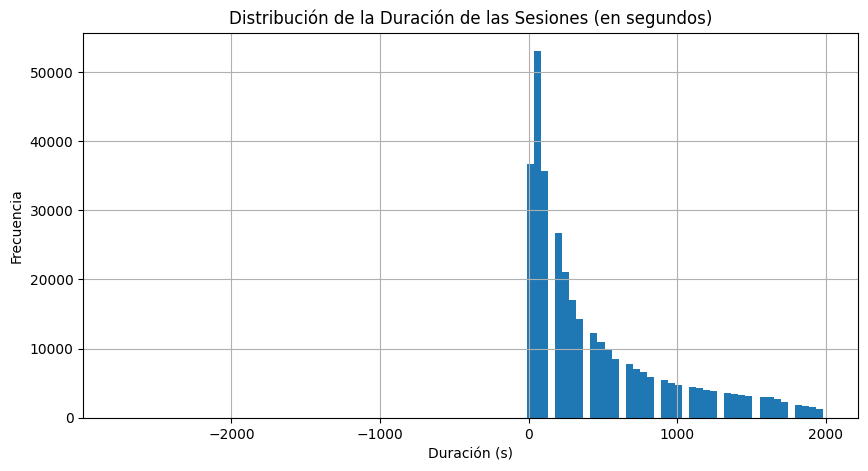

In [15]:
# Calcular la duración de cada sesión en segundos
visits['session_duration_s'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds()

# Calcular la duración promedio (media) de la sesión
avg_session_duration = visits['session_duration_s'].mean()

# Calcular la moda de la duración, que es útil para datos sesgados
mode_session_duration = visits['session_duration_s'].mode()[0]

print("\n 3--- Métricas de Duración de Sesión ---")
print(f"Duración promedio de una sesión (media): {avg_session_duration:.0f} segundos")
print(f"Duración más frecuente de una sesión (moda): {mode_session_duration:.0f} segundos")

# Visualizar la distribución de la duración de la sesión
plt.figure(figsize=(10, 5))
# Filtramos para ver mejor la distribución, excluyendo outliers muy largos
visits[visits['session_duration_s'] < 2000]['session_duration_s'].hist(bins=100)
plt.title('Distribución de la Duración de las Sesiones (en segundos)')
plt.xlabel('Duración (s)')
plt.ylabel('Frecuencia')
plt.show()



--- Tasa de Retención por Cohorte Mensual ---


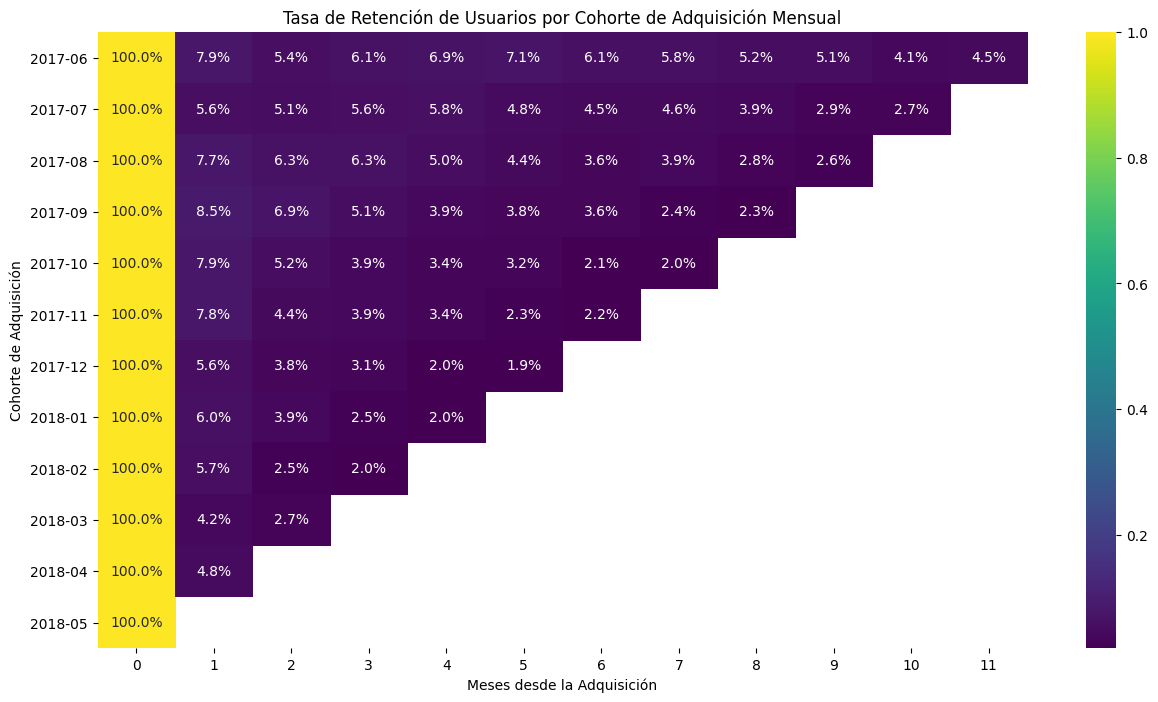


4 --- Tasa de retención promedio para el primer mes después de la adquisición: 6.52%


In [16]:
# Análisis de Cohortes y Tasa de Retención

# Encontrar la fecha de la primera sesión de cada usuario (mes de adquisición)
first_session = visits.groupby('Uid')['Start Ts'].min()
first_session.name = 'first_session'
visits = visits.join(first_session, on='Uid')
visits['acquisition_month'] = visits['first_session'].dt.to_period('M')

# Calcular el mes de cada sesión
visits['session_month'] = visits['Start Ts'].dt.to_period('M')

# Calcular la vida de la cohorte (cuántos meses han pasado desde la adquisición)
visits['cohort_lifetime'] = (visits['session_month'] - visits['acquisition_month']).apply(lambda x: x.n)

# Construir la tabla de cohortes contando usuarios únicos
cohorts = visits.groupby(['acquisition_month', 'cohort_lifetime'])['Uid'].nunique().reset_index()

# Crear una tabla dinámica (pivot) para la retención
cohort_pivot = cohorts.pivot_table(
    index='acquisition_month',
    columns='cohort_lifetime',
    values='Uid'
)

# Calcular el tamaño inicial de cada cohorte (mes 0)
cohort_size = cohort_pivot.iloc[:, 0]

# Calcular la tasa de retención dividiendo por el tamaño de la cohorte
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

# Visualizar la tasa de retención con un mapa de calor
print("\n--- Tasa de Retención por Cohorte Mensual ---")
plt.figure(figsize=(15, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.1%', cmap='viridis')
plt.title('Tasa de Retención de Usuarios por Cohorte de Adquisición Mensual')
plt.xlabel('Meses desde la Adquisición')
plt.ylabel('Cohorte de Adquisición')
plt.show()

# Calcular la tasa de retención promedio para el primer mes
# Excluimos la cohorte más reciente si aún no ha completado un mes
retention_month_1 = retention_matrix[1].dropna().mean()
print(f"\n4 --- Tasa de retención promedio para el primer mes después de la adquisición: {retention_month_1:.2%}")

Conclusiones respecto a Visitas

1. Metricas de usuarios

El servicio no es una plataforma de uso diario, sino de compra puntual.
La conclusión más importante se obtiene al comparar los usuarios diarios con los mensuales. La "tasa de adherencia" (Stickiness Rate) se calcula como DAU / MAU.

Cálculo: 908 / 23,228 = 3.9%
Interpretación: Solo un 3.9% de los usuarios activos mensuales utiliza la plataforma en un día promedio. Esto indica que Showz no es una aplicación que los usuarios abran por hábito diario (como una red social o una app de noticias). En cambio, su uso está motivado por una necesidad específica e infrecuente: buscar o comprar entradas para un evento. Esto es completamente normal y esperado para un negocio de este tipo.

Implicación para el negocio: Los esfuerzos de marketing no deben centrarse en crear un hábito de uso diario, sino en asegurar que Showz sea la primera opción que viene a la mente del usuario cuando decide buscar un evento. La estrategia debe enfocarse en capturar la intención de compra.

El ciclo de interacción del usuario es más semanal que diario.
La relación entre usuarios semanales y mensuales (WAU / MAU) nos da una mejor perspectiva de la frecuencia de uso.

Cálculo: 5,716 / 23,228 = 24.6%
Interpretación: Aproximadamente una cuarta parte de los usuarios mensuales interactúa con el servicio en una semana determinada. Esto sugiere que los usuarios pueden entrar a la plataforma para planificar sus actividades de ocio de la semana o del fin de semana. El ciclo de "revisar qué eventos hay" parece ser semanal.

Implicación para el negocio: Las campañas de marketing semanales, como un boletín por correo con los "eventos de la semana" o "nuevos espectáculos anunciados", podrían ser muy efectivas para reactivar a la base de usuarios.

Existe una base de usuarios mensual sólida pero fragmentada.
Con más de 23,000 usuarios activos al mes, la plataforma tiene un alcance considerable. Sin embargo, el hecho de que el WAU sea significativamente menor que el MAU, y el DAU mucho menor que el WAU, refuerza que diferentes grupos de usuarios visitan el sitio en diferentes momentos del mes, probablemente sin regresar con alta frecuencia.

Implicación para el negocio: El reto principal no es solo adquirir nuevos usuarios, sino también reactivar a los usuarios existentes. Dado que el uso es esporádico, las estrategias de retención (que veremos más adelante en el análisis de cohortes) son cruciales para maximizar el valor de cada cliente a lo largo del tiempo.

Resumen Estratégico:
Los usuarios tratan a Showz como una herramienta transaccional, no como un destino de entretenimiento diario. El comportamiento natural es visitar el sitio con una intención clara, probablemente en un ciclo de planificación semanal o mensual.

Recomendación: Orienta las estrategias de marketing para alinearse con este comportamiento. Utilizar campañas de correo electrónico semanales y notificaciones sobre nuevos eventos para mantener a Showz en la mente de tu base de usuarios de 23,000 personas.

2. Sesiones de usuarios

Sesiones diarias promedio: 987
Usuarios activos diarios (DAU) promedio: 908
Ratio: 987 sesiones / 908 usuarios = 1.09 sesiones por usuario al día
Interpretación: Este ratio, tan cercano a 1, indica que los usuarios que visitan la web en un día determinado lo hacen, en su gran mayoría, una sola vez. No regresan varias veces a lo largo del mismo día.

Implicación para el negocio: Esto refuerza la idea de que el uso de la plataforma es transaccional y dirigido por un objetivo claro. Un usuario entra, busca la información o el boleto que necesita, y se va. No hay un comportamiento de navegación o "descubrimiento" que lo haga regresar varias veces en 24 horas. El diseño del sitio debe optimizarse para la eficiencia y la finalización rápida de tareas.

Señales de baja lealtad a largo plazo
El dato de "1.58 sesiones por usuario" es quizás el más revelador y preocupante hasta ahora.

Interpretación: Que el usuario promedio genere solo 1.58 sesiones a lo largo de dos años es un número muy bajo. Sugiere que una gran proporción de la base de usuarios son "visitantes de una sola vez". Llegan a la plataforma para un evento específico, y una vez que este pasa, no regresan.

Implicación para el negocio: Este es un indicador clásico de un problema de retención a largo plazo. La empresa podría estar gastando dinero en marketing para adquirir nuevos clientes que, en su mayoría, no se convierten en clientes recurrentes. Si bien ya establecimos que no se espera un uso diario, sí se esperaría que un cliente satisfecho regresara para comprar entradas para otros eventos en el futuro.

3. Duracion de sesiones

Histograma: Muestra una gran concentración de sesiones muy cortas y una larga cola de sesiones más largas (sesgo a la derecha).

El histograma revela un hallazgo inesperado: Existen duraciones de sesión negativas. Una duración negativa significa que la marca de tiempo de fin de la sesión (End Ts) es anterior a la de inicio (Start Ts). Esto es lógicamente imposible y apunta a un error en la recolección de datos. Podría deberse a problemas de sincronización de servidores, errores de registro o algún tipo de corrupción de datos.

La duración "típica" de una sesión es de 60 segundos. La diferencia drástica entre la media (643s) y la moda (60s) es el resultado directo de la distribución que se ve en el gráfico.

Interpretación: La moda (60 segundos) es la métrica más representativa de una sesión de usuario normal. La gran mayoría de las visitas son muy breves. La media es engañosa porque está fuertemente inflada por un número pequeño de sesiones extremadamente largas (la "cola derecha" del histograma), que podrían ser usuarios que dejan la pestaña abierta en su navegador.

Implicación para el negocio: El comportamiento más común es una visita rápida. En 60 segundos, un usuario puede:
Aterrizar en la página y abandonarla rápidamente (un "rebote" o bounce).
Verificar rápidamente el precio o la fecha de un evento específico.
Determinar que el evento que busca no está disponible.
Esto refuerza la idea de que los usuarios son decisivos y transaccionales. Necesitan encontrar la información que buscan de manera inmediata.

El gráfico nos muestra dos tipos de historias de usuario:
El Visitante Rápido (La gran mayoría): Sesiones de alrededor de un minuto. Son usuarios que buscan información específica y actúan con rapidez.
El Navegador Profundo o Inactivo (La minoría): Sesiones de más de 10-15 minutos. Estos podrían ser usuarios que comparan múltiples eventos, completan un proceso de compra más complejo, o simplemente han dejado la pestaña inactiva.

Implicación para el negocio: El sitio web debe estar optimizado para el primer grupo, que es la mayoría. La información clave (fechas, precios, botón de compra) debe ser visible y accesible. Para el segundo grupo, la empresa podría analizar estas sesiones más largas para entender el camino de compra o identificar puntos de fricción que hacen que el proceso se alargue.

Resumen Estratégico
La duración de la sesión confirma el patrón: la mayoría de los usuarios de Showz obtienen lo que necesitan en un minuto y salen.

Recomendaciones:

Optimizar para la rapidez: El diseño de la interfaz debe priorizar la velocidad y la facilidad para encontrar información.
Investigar las sesiones cortas: Es crucial determinar si estas sesiones de 60 segundos son "buenas" (el usuario encontró lo que quería y se fue satisfecho) o "malas" (el usuario no encontró lo que buscaba y se fue frustrado). Herramientas como encuestas de salida o mapas de calor (heatmaps) podrían proporcionar esta información.

4. Frecuencia de usuarios

La Conclusión Principal: La retención de usuarios es extremadamente baja.

Interpretación: Un promedio de retención del 6.52% para el primer mes es la conclusión más alarmante. Significa que, de cada 100 usuarios que Showz adquiere, más de 93 no regresan al mes siguiente. Se desvanecen después de su primera interacción.

Implicación para el negocio: Este es el problema fundamental que debe resolver la empresa. Gastar dinero en marketing para atraer clientes es ineficiente si la plataforma es incapaz de retenerlos. La prioridad número uno de Showz debería ser entender por qué se van los usuarios y mejorar la retención del primer mes.

No se construye lealtad a largo plazo. Si observamos las filas de las cohortes más antiguas (como la de Junio de 2017), la retención sigue cayendo con el tiempo.

Interpretación: La línea de la cohorte 2017-06 muestra que, después de la caída inicial, la retención se erosiona lentamente hasta llegar a un 4.5% en el mes 11. Esto demuestra que el producto, en su estado actual, no crea una relación duradera. Incluso el pequeño porcentaje de usuarios que regresa inicialmente no se mantiene fiel a largo plazo.

Implicación para el negocio: No existe una base de clientes leales que regrese de forma recurrente. La empresa depende constantemente de la adquisición de nuevos clientes para mantener su actividad, lo cual es una estrategia costosa y arriesgada. Se deben implementar mecanismos para fomentar la lealtad, como programas de puntos, alertas personalizadas de eventos o descuentos para clientes recurrentes.

No hay una mejora clara en la calidad de las cohortes a lo largo del tiempo. Al comparar las cohortes más nuevas con las más antiguas, no se observa una tendencia positiva clara.

Interpretación: La retención del primer mes es volátil: fue del 7.9% en Junio de 2017, alcanzó un pico del 8.5% en Septiembre de 2017, pero cayó al 4.2% en Marzo de 2018. Esto indica que las posibles mejoras en el producto o en las estrategias de marketing durante este período no lograron un impacto positivo y sostenido en la retención. El problema es crónico y no ha sido resuelto.

Implicación para el negocio: La empresa debería investigar qué ocurrió en los meses con un rendimiento ligeramente superior (p. ej., Septiembre de 2017). ¿Hubo algún evento o festival muy popular que atrajera a usuarios de mayor calidad? ¿Se lanzó una campaña de marketing particularmente exitosa? Analizar estos picos puede dar pistas sobre qué tipo de clientes o eventos tienen mayor potencial de retención.

* Ventas

1 --- Métricas de Tiempo hasta la Conversión ---
Tiempo promedio hasta la primera compra: 16.73 días
Tiempo mediano hasta la primera compra: 0.00 días


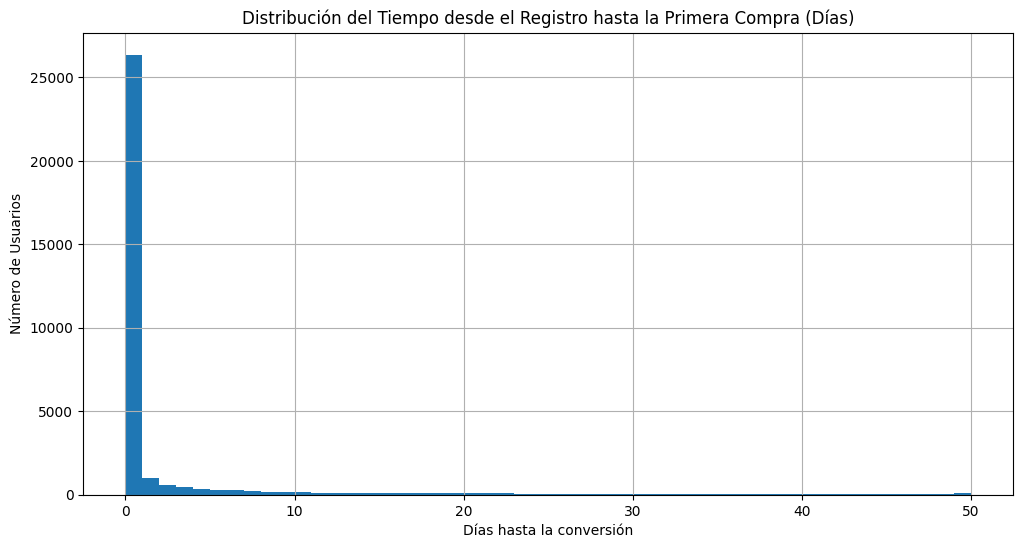


Porcentaje de usuarios que compran el mismo día de su registro: 72.18%


In [17]:
# ¿Cuando empieza la gente a comprar?
# Obtener la fecha de la primera sesión de cada usuario (registro)
first_session = visits.groupby('Uid')['Start Ts'].min().reset_index()
first_session.columns = ['Uid', 'registration_ts']

# Obtener la fecha de la primera compra de cada usuario
first_order = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_order.columns = ['Uid', 'first_order_ts']

# Unir las dos tablas para tener la fecha de registro y primera compra por usuario
conversion_data = pd.merge(first_session, first_order, on='Uid')

# Calcular la diferencia en días
conversion_data['time_to_conversion_days'] = (conversion_data['first_order_ts'] - conversion_data['registration_ts']).dt.days

# Mostrar métricas clave sobre el tiempo de conversión
print("1 --- Métricas de Tiempo hasta la Conversión ---")
print(f"Tiempo promedio hasta la primera compra: {conversion_data['time_to_conversion_days'].mean():.2f} días")
print(f"Tiempo mediano hasta la primera compra: {conversion_data['time_to_conversion_days'].median():.2f} días")

# Visualizar la distribución
plt.figure(figsize=(12, 6))
plt.hist(conversion_data['time_to_conversion_days'], bins=50, range=(0, 50))
plt.title('Distribución del Tiempo desde el Registro hasta la Primera Compra (Días)')
plt.xlabel('Días hasta la conversión')
plt.ylabel('Número de Usuarios')
plt.grid(True)
plt.show()

# La mayoría de las compras ocurren el día 0, vamos a calcular el porcentaje
conversion_day_0 = (conversion_data['time_to_conversion_days'] == 0).sum()
total_conversions = len(conversion_data)
print(f"\nPorcentaje de usuarios que compran el mismo día de su registro: {conversion_day_0 / total_conversions:.2%}")


In [18]:
# ¿Cuántos pedidos hacen durante un período de tiempo dado? ---

# Primero, calculemos una métrica simple: el promedio de pedidos por cliente que ha comprado
orders_per_customer = len(orders) / orders['Uid'].nunique()
print(f"\n 2 --- Métricas de Frecuencia de Pedidos ---")
print(f"Promedio de pedidos por cliente (que ha comprado): {orders_per_customer:.2f}")


 2 --- Métricas de Frecuencia de Pedidos ---
Promedio de pedidos por cliente (que ha comprado): 1.38



 3 --- Métricas de Tamaño de Compra ---
Tamaño promedio de compra (ticket promedio): $5.00


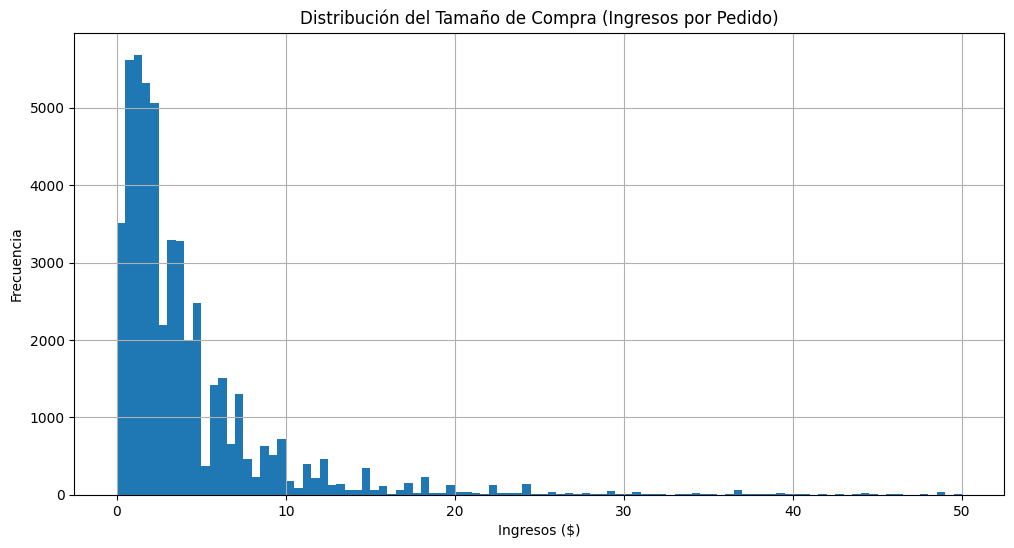

In [19]:
# ¿Cuál es el tamaño promedio de compra? ---

average_purchase_size = orders['Revenue'].mean()
print(f"\n 3 --- Métricas de Tamaño de Compra ---")
print(f"Tamaño promedio de compra (ticket promedio): ${average_purchase_size:.2f}")

# Visualizar la distribución de los ingresos por pedido
plt.figure(figsize=(12, 6))
plt.hist(orders['Revenue'], bins=100, range=(0, 50))
plt.title('Distribución del Tamaño de Compra (Ingresos por Pedido)')
plt.xlabel('Ingresos ($)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


 4 --- LTV Acumulado por Cliente por Cohorte ---


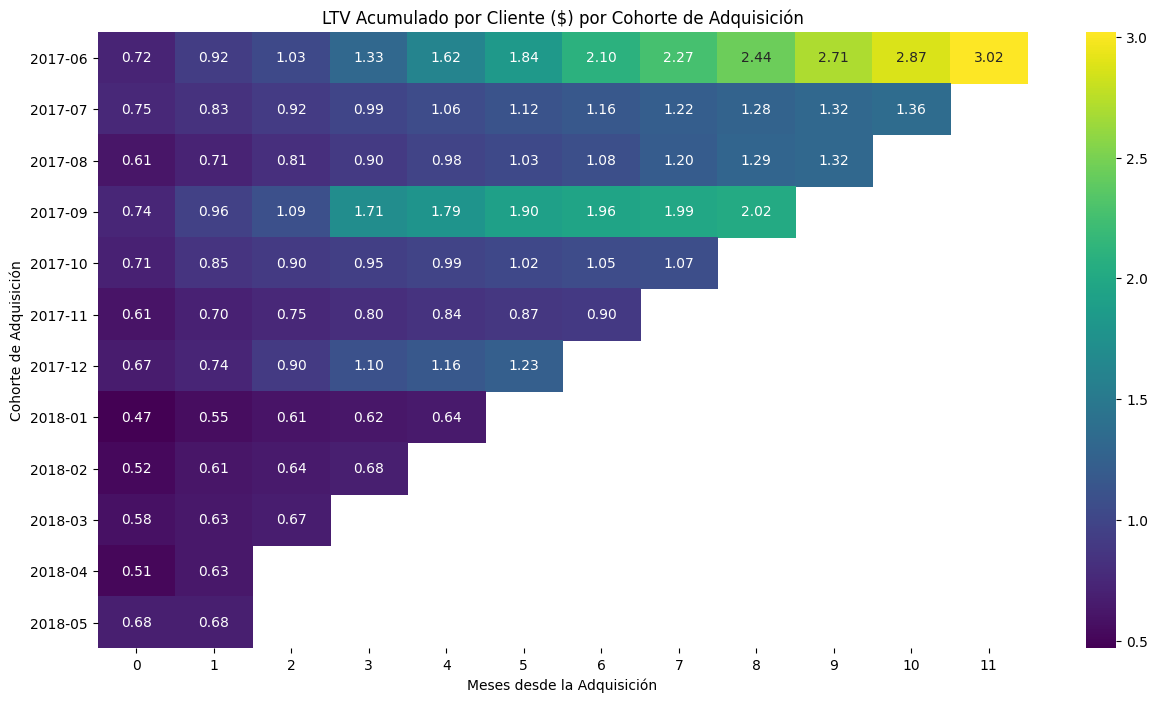


LTV total de la cohorte más antigua (Junio 2017) después de 11 meses: $3.02


In [20]:
#¿Cuánto dinero traen? (Cálculo del LTV) ---

# Paso A: Asignar a cada usuario su cohorte de adquisición (mes de la primera sesión)
first_session_month = visits.groupby('Uid')['Start Ts'].min().dt.to_period('M').reset_index()
first_session_month.columns = ['Uid', 'acquisition_month']

# Paso B: Calcular el tamaño de cada cohorte
cohort_sizes = first_session_month.groupby('acquisition_month')['Uid'].nunique().reset_index()
cohort_sizes.columns = ['acquisition_month', 'cohort_size']

# Paso C: Unir la cohorte de adquisición a la tabla de pedidos
orders_with_cohorts = pd.merge(orders, first_session_month, on='Uid')
orders_with_cohorts['order_month'] = orders_with_cohorts['Buy Ts'].dt.to_period('M')

# Paso D: Calcular los ingresos por cohorte y mes
cohort_revenue = orders_with_cohorts.groupby(['acquisition_month', 'order_month'])['Revenue'].sum().reset_index()

# Paso E: Unir los ingresos con el tamaño de la cohorte
report = pd.merge(cohort_sizes, cohort_revenue, on='acquisition_month')

# Paso F: Calcular la edad de la cohorte y el LTV
report['age'] = (report['order_month'] - report['acquisition_month']).apply(lambda x: x.n)
report['ltv'] = report['Revenue'] / report['cohort_size']

# Paso G: Crear una tabla dinámica para visualizar el LTV
ltv_pivot = report.pivot_table(
    index='acquisition_month',
    columns='age',
    values='ltv',
    aggfunc='sum'
)

# Calcular el LTV acumulado
cumulative_ltv_pivot = ltv_pivot.cumsum(axis=1)

# Visualizar el LTV acumulado con un mapa de calor
print("\n 4 --- LTV Acumulado por Cliente por Cohorte ---")
plt.figure(figsize=(15, 8))
sns.heatmap(cumulative_ltv_pivot, annot=True, fmt='.2f', cmap='viridis')
plt.title('LTV Acumulado por Cliente ($) por Cohorte de Adquisición')
plt.xlabel('Meses desde la Adquisición')
plt.ylabel('Cohorte de Adquisición')
plt.show()

# Calcular el LTV de la cohorte más antigua para tener una visión a largo plazo
ltv_11_months = cumulative_ltv_pivot.loc['2017-06'].max()
print(f"\nLTV total de la cohorte más antigua (Junio 2017) después de 11 meses: ${ltv_11_months:.2f}")

Conclusiones Ventas

1. Metricas de tiempo

Conclusión 1. La conversión es un evento inmediato y de alta intención. Esta es la conclusión más importante. La gran mayoría de los clientes se deciden en el momento.

Evidencia Clave: El hecho de que la mediana sea de 0 días y que el 72.18% de los compradores lo hagan el mismo día de su primera visita es una prueba contundente de que casi toda la actividad de conversión ocurre en el primer punto de contacto.

Interpretación: Los usuarios no llegan a Showz a "curiosear" durante semanas. Llegan con una alta intención de compra. Probablemente buscaron un evento específico y están listos para adquirir las entradas de inmediato. La plataforma funciona como una solución "on-demand" para una necesidad presente.

Implicación para el Negocio: Esto es una excelente noticia. Significa que las campañas de marketing que capturan la intención (como los anuncios en buscadores) pueden tener un retorno de inversión casi instantáneo. El viaje del cliente desde que descubre la página hasta que finaliza la compra debe ser lo más corto y fluido posible. 

Conclusión 2. La Métrica del Promedio (Media) es Engañosa y debe Ignorarse. Es crucial entender por qué el promedio es tan diferente de la mediana.

Evidencia Clave: Un promedio de 16.73 días parece contradecir por completo un comportamiento de compra inmediato.

Interpretación: Esta discrepancia se debe a los valores atípicos. Un pequeño grupo de usuarios tarda muchos días o incluso meses en realizar su primera compra. Estos pocos casos extremos "arrastran" el promedio hacia arriba, creando una imagen distorsionada de la realidad. La mediana (0 días) es la métrica que representa fielmente el comportamiento del cliente típico.

Implicación para el Negocio: El equipo debe basar sus decisiones y reportes en la mediana, no en la media, para medir la velocidad de conversión. Analizar a ese pequeño grupo de "conversores tardíos" podría ser interesante para ver si responden a campañas de retargeting, pero no deben distraer del hecho de que el negocio principal se mueve a la velocidad del rayo.

Resumen Estratégico:
Los resultados confirman que el modelo de negocio de Showz se basa en la satisfacción de una necesidad inmediata. El ciclo de vida del cliente es corto y decisivo.

Recomendaciones:
Optimizar el viaje del día 0: Cada clic y cada segundo cuenta. La página de destino, el proceso de selección de asientos y el checkout deben ser impecables para no perder el impulso de compra.
Enfocar el marketing en la iontención: Invertir en canales donde los usuarios demuestran una intención de compra activa (por ejemplo, Google Ads para búsquedas como "entradas para "nombre del evento"") es la estrategia más rentable.

2. Frecuencia de Pedidos

Conclusión 1: La primera compra es prácticamente la única. Este número, aunque parece simple, es extremadamente revelador y preocupante.

Evidencia Clave: Un promedio de 1.38 pedidos por cliente a lo largo de un período de dos años es un valor muy bajo. Si la mayoría de los clientes comprara dos veces, el promedio sería cercano a 2.0. Si muchos compraran tres o cuatro veces, sería aún mayor. Un valor de 1.38 indica que la inmensa mayoría de los clientes compra una sola vez.

Interpretación: El viaje del cliente en Showz es: Visita -> Compra -> Desaparición. La plataforma no logra convertir a un comprador de primera vez en un cliente recurrente. Se confirma que el comportamiento es puramente transaccional, sin generar lealtad.

Implicación para el Negocio: Este es un indicador de una salud empresarial frágil a largo plazo. Un negocio sostenible se basa en la repetición de compras, ya que el costo de retener a un cliente es mucho menor que el de adquirir uno nuevo. Showz parece estar en un ciclo constante y costoso de adquisición de clientes de un solo uso.

Conclusión 2: Refuerza el Diagnóstico de "Cero Retención". Este resultado es la otra cara de la moneda del análisis de cohortes que vimos anteriormente.

Evidencia Clave: El mapa de calor nos mostró que más del 93% de los usuarios no regresan al mes siguiente. Esta métrica de 1.38 pedidos nos dice que, incluso del exclusivo grupo que sí se convierte en cliente, casi ninguno vuelve a realizar una compra. Ambos análisis apuntan exactamente al mismo problema.

Interpretación: El problema no es solo que los usuarios no visitan la web de nuevo, es que no vuelven a gastar dinero. La acción principal que genera ingresos para el negocio no se repite.

Implicación para el Negocio: La empresa está dejando sobre la mesa la oportunidad más valiosa: la segunda venta. No se está capitalizando la relación con los clientes existentes. Esto plantea preguntas críticas sobre la estrategia post-compra: ¿Existe alguna comunicación de seguimiento? ¿Se envían recomendaciones personalizadas para eventos futuros? ¿Se notifica a los clientes cuando un artista de su interés anuncia una nueva fecha?

Resumen Estratégico:
Showz es una máquina de generar clientes de una sola transacción.

3. Tamaño de Compra

Tamaño promedio de compra: 5 USD
Histograma: Muestra una alta frecuencia de compras de bajo valor (la mayoría por debajo de 5) y una larga cola de compras de mayor valor.

Conclusión 1. El negocio se basa en transacciones de bajo valor. El histograma revela la naturaleza económica de las ventas de Showz.

Evidencia Clave: El histograma muestra que la gran mayoría de las transacciones individuales generan muy pocos ingresos, con un pico de frecuencia en el rango de 1 a 5. El promedio de 5 está "inflado" por un número menor de compras de mayor valor.

Interpretación: El negocio principal de Showz no son los eventos caros o los paquetes VIP, sino las transacciones de bajo costo. Esto podría corresponder a entradas para eventos muy económicos, cargos por servicio, o la compra de un solo boleto en lugar de varios. El modelo de negocio es de alto volumen y bajo margen por transacción.

Implicación para el negocio: Un modelo de bajo margen es extremadamente sensible a los costos. Cada centavo gastado, especialmente en marketing, cuenta. La rentabilidad de la empresa no proviene de grandes ventas individuales, sino de la capacidad de procesar un gran número de pequeñas transacciones de la manera más eficiente posible.

Conclusión 2. Un ticket promedio de 5 pone una presión inmensa sobre la rentabilidad. Este resultado, combinado con la falta de recurrencia, es crítico para la viabilidad financiera del negocio.

Evidencia Clave: Un ticket promedio de 5 y un promedio de 1.38 pedidos por cliente.
Interpretación: Podemos hacer un cálculo rápido y preliminar del valor de vida de un cliente (LTV) promedio que ya ha comprado: Ticket Promedio × Pedidos Promedio por Cliente = 5 × 1.38 = 6.90. Esto significa que, en promedio, un cliente que realiza una compra genera menos de 7 USD para la compañía durante toda su vida.

Implicación para el Negacio: Este es el hallazgo financiero más importante hasta ahora. Para que el negocio sea rentable, el costo de adquisición de cliente (CAC) debe ser significativamente inferior a 6.90. Esto establece un techo muy bajo para el gasto en marketing. Cualquier canal de marketing donde el costo por adquisición supere los pocos dólares estará, casi con toda seguridad, generando pérdidas.

Resumen Estratégico: Hemos definido el modelo de negocio de Showz ---> Alto Volumen, Bajo Margen y Baja Retención. Esta es una combinación muy precaria. La empresa sobrevive gracias a un flujo constante de nuevos clientes que realizan una pequeña compra y, en su mayoría, nunca más regresan.

4. LTV

Conclusión 1. El Valor de Vida del Cliente (LTV) es críticamente bajo.

Evidencia Clave: La cohorte con mejor rendimiento (2017-06) apenas logra generar 3.02 USD por cliente después de casi un año. Otras cohortes, como la de Septiembre de 2017, que parecía prometedora, se estancan alrededor de los 2 USD.

Interpretación: La combinación de una tasa de retención bajísima, una frecuencia de compra de casi una sola vez y un ticket promedio de solo 5 USD da como resultado un cliente que, en términos económicos, aporta muy poco valor a la empresa a lo largo de su vida.

Implicación para el Negocio: Este número (3.02 en el mejor de los casos) es la cifra final que se debe comparar con el CAC. 

Conclusión 2. La calidad de los clientes se ha deteriorado. Al comparar las cohortes a lo largo del tiempo, se observa una tendencia muy preocupante.

Evidencia Clave: Comparemos el LTV después de 6 meses. La cohorte de Junio de 2017 (2017-06) alcanzó un LTV de 1.84 USD. Sin embargo, la cohorte de Enero de 2018 (2018-01), después de 4 meses, solo llegó a 0.64 USD. Las cohortes de 2018 son consistentemente peores que las de 2017.

Interpretación: La empresa no solo tiene un problema de bajo LTV, sino que el problema está empeorando. Los clientes adquiridos más recientemente son significativamente menos valiosos que los adquiridos en el pasado.

Implicación para el Negocio: Es importante que la empresa investigue qué cambió entre 2017 y 2018. ¿Se cambiaron los canales de marketing a unos de menor calidad pero más baratos? ¿Aumentó la competencia? ¿Hubo cambios en el producto que empeoraron la experiencia? La estrategia de adquisición se está volviendo menos efectiva y más ineficiente con el tiempo.

Este análisis nos ha llevado al momento decisivo. La viabilidad de Showz se reduce a una simple ecuación matemática:

LTV > CAC (¿El Valor de Vida del Cliente es mayor que el Costo de Adquisición de Cliente?)

Si el costo de adquirir un cliente (CAC) es, por ejemplo, 4 USD, entonces ninguna cohorte es rentable, ya que la que más genera solo llega a 3.02. En este escenario, la empresa pierde dinero con cada nuevo cliente.
Si el CAC es de 2.00, la cohorte de Junio 2017 se vuelve rentable alrededor del mes 7 (2.10). La de Septiembre 2017 lo logra en el mes 8 (2.02).

Calculo de CAC (No solicitado)

--- CAC (Costo de Adquisición de Cliente) por Mes ---
      month  total_costs  n_customers       cac
0   2017-06     18015.00        13259  1.358700
1   2017-07     18240.59        13140  1.388173
2   2017-08     14790.54        10181  1.452759
3   2017-09     24368.91        16704  1.458867
4   2017-10     36322.88        25977  1.398271
5   2017-11     37907.88        27248  1.391217
6   2017-12     38315.35        25268  1.516359
7   2018-01     33518.52        22624  1.481547
8   2018-02     32723.03        22197  1.474210
9   2018-03     30415.27        20589  1.477258
10  2018-04     22289.38        15709  1.418892
11  2018-05     22224.27        15273  1.455135

Costo de Adquisición de Cliente (CAC) promedio general: $1.44


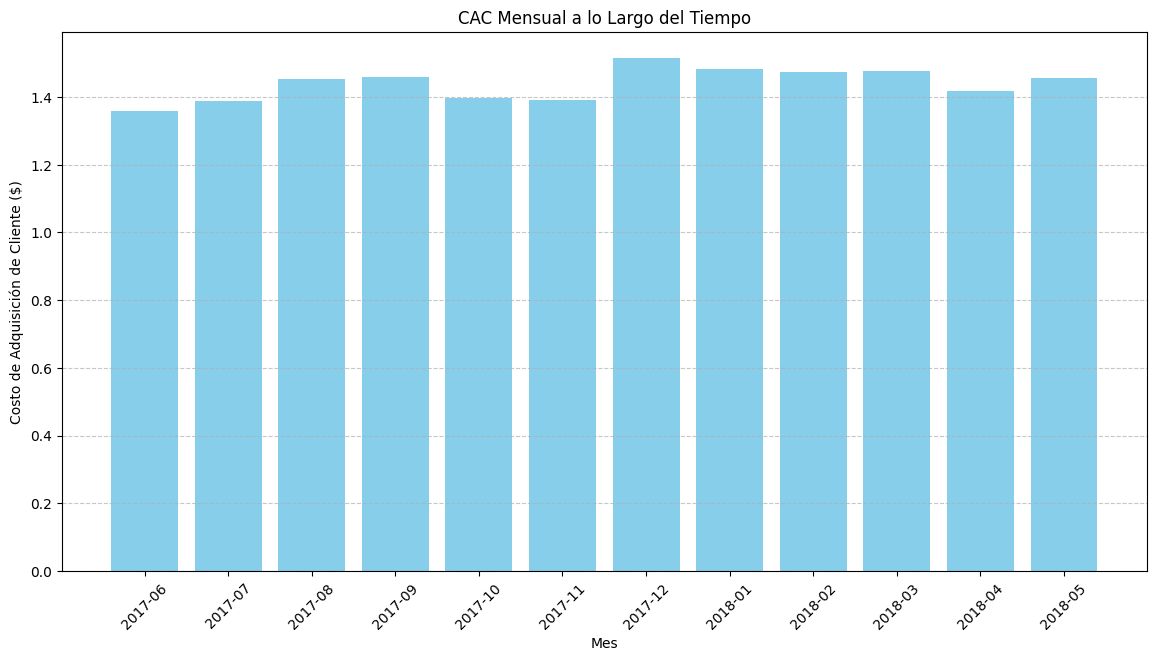

In [21]:
# Calcular los gastos totales de marketing por mes ---

# Extraer el mes de la columna de fechas de gastos
costs['cost_month'] = costs['dt'].dt.to_period('M')

# Agrupar por mes y sumar los costos para obtener el gasto mensual total
monthly_costs = costs.groupby('cost_month')['costs'].sum().reset_index()
monthly_costs.columns = ['month', 'total_costs']


# Obtener el número de clientes nuevos por mes (tamaño de la cohorte) ---

# Este cálculo ya se realizó para el LTV. Lo repetimos aquí para mayor claridad.
first_session_month = visits.groupby('Uid')['Start Ts'].min().dt.to_period('M').reset_index()
first_session_month.columns = ['Uid', 'acquisition_month']

# Contar el número de usuarios únicos por cohorte/mes de adquisición
cohort_sizes = first_session_month.groupby('acquisition_month')['Uid'].nunique().reset_index()
cohort_sizes.columns = ['month', 'n_customers']

# Unir los costos mensuales y los clientes nuevos ---

# Unimos las dos tablas usando el mes como clave
report_cac = pd.merge(monthly_costs, cohort_sizes, on='month')

# Calcular el CAC ---

# El CAC es el costo total dividido por el número de clientes nuevos
report_cac['cac'] = report_cac['total_costs'] / report_cac['n_customers']

# Mostrar los resultados ---

print("--- CAC (Costo de Adquisición de Cliente) por Mes ---")
print(report_cac)

# Calcular el CAC promedio general
average_cac = report_cac['cac'].mean()
print(f"\nCosto de Adquisición de Cliente (CAC) promedio general: ${average_cac:.2f}")

# Visualizar el CAC a lo largo del tiempo
plt.figure(figsize=(14, 7))
plt.bar(report_cac['month'].astype(str), report_cac['cac'], color='skyblue')
plt.title('CAC Mensual a lo Largo del Tiempo')
plt.xlabel('Mes')
plt.ylabel('Costo de Adquisición de Cliente ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Conclusión final de ventas

Un Modelo Rentable, pero en una situación precaria y posible declive. El análisis completo, culminando con la comparación entre el Valor de Vida del Cliente (LTV) y el Costo de Adquisición de Cliente (CAC), revela una historia de dos caras:

La Buena Noticia: El modelo de negocio de Showz es (o fue) rentable. A primera vista, el negocio funciona. La relación LTV/CAC es positiva para las mejores cohortes.

Evidencia Clave: La cohorte de Junio de 2017, la de mejor rendimiento, alcanzó un LTV de 3.02 USD. Comparado con un CAC promedio de $1.44, cada cliente de esta cohorte generó más del doble de lo que costó adquirirlo.

ROI de la cohorte 2017-06: (3.02 - 1.44) / 1.44 = 110%

Interpretación: Por cada dólar invertido en adquirir un cliente en junio de 2017, la empresa obtuvo ese dólar de vuelta y un adicional de 1.10 en ganancias a lo largo de 11 meses. Esto demuestra que, bajo las condiciones correctas, el modelo de negocio era viable y rentable.

La Mala Noticia: La Rentabilidad está en caída libre. La rentabilidad pasada no garantiza el éxito futuro. 

Evidencia Clave: Las cohortes adquiridas en 2018 son un desastre financiero. Su LTV apenas supera los 0.70 USD, un valor muy por debajo del CAC de 1.44.

Interpretación: Showz está perdiendo dinero con cada cliente nuevo adquirido en 2018. Por cada cliente que costó 1.44 atraer, la empresa solo recupera alrededor de 0.70, resultando en una pérdida neta de 0.74 por cliente. La estrategia de adquisición se ha vuelto destructiva para el valor de la empresa.

¿Por Qué Ocurre Esto? Todo el proyecto nos ha llevado a entender las causas de esta precaria situación:
El LTV es intrínsecamente bajo: El valor del cliente está limitado por la combinación fatal de:
Nula retención: Los clientes no regresan (mapa de calor de retención).
Compras únicas: Incluso los que compran, no repiten (1.38 pedidos/cliente).
Ticket promedio Bajo: Cada compra genera poco valor (5.00 por transacción).
La estrategia de adquisición se ha degradado: La caída drástica en el LTV de las cohortes de 2018 indica que la empresa comenzó a invertir en canales de marketing o campañas que atraen a un público de muchísima menor calidad (o "curiosos" que no convierten ni repiten) que los que atraía en 2017.

Recomendaciones Estratégicas:

Prioridad #1: Investigar y Revertir el Desplome de 2018. Es urgente realizar un análisis forense para responder: ¿Qué cambió en la estrategia de marketing entre finales de 2017 y principios de 2018?

Acción: Analizar el CAC y el LTV por canal de marketing. Abandonar o rediseñar los canales que traen a los clientes no rentables de 2018 y duplicar la inversión en los que trajeron a los clientes de alto valor de 2017.

Prioridad #2: Obsesionarse con aumentar el LTV. La palanca más poderosa para el crecimiento es lograr que los clientes existentes gasten más. Un pequeño aumento en la retención tendría un impacto masivo en la rentabilidad.

Acción: Implementar un programa de retención. Ideas de bajo costo incluyen:
Campañas de Email Marketing: Enviar recomendaciones personalizadas post-compra (por ejemplo: "Si te gustó este evento, te gustará este otro").

Alertas y notificaciones: Avisar a los usuarios cuando sus artistas o eventos favoritos estén disponibles.
Pequeños Incentivos: Ofrecer un pequeño descuento en la segunda compra.

* Marketing

1 --- Análisis de Gastos de Marketing ---
Gasto total en marketing: $329,131.62

Gasto total por fuente de adquisición:
source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64


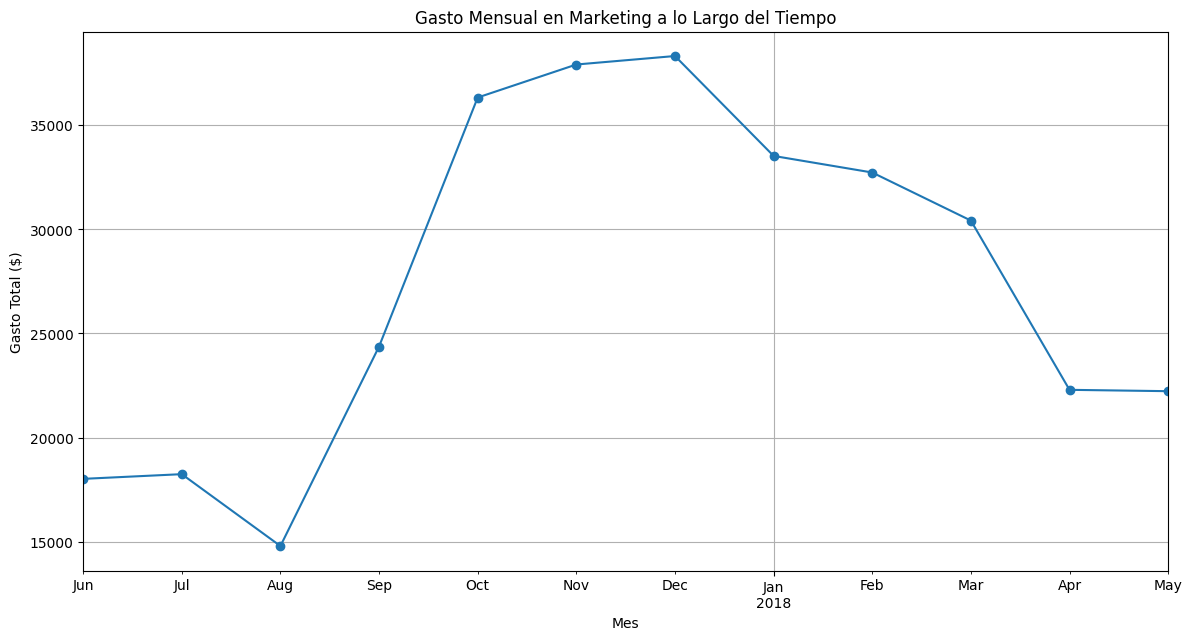

In [23]:
# Gasto total
total_spend = costs['costs'].sum()
print("1 --- Análisis de Gastos de Marketing ---")
print(f"Gasto total en marketing: ${total_spend:,.2f}")

# Gasto por fuente de adquisición
spend_by_source = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print("\nGasto total por fuente de adquisición:")
print(spend_by_source)

# Gasto a lo largo del tiempo (mensual)
costs['cost_month'] = costs['dt'].dt.to_period('M')
spend_over_time = costs.groupby('cost_month')['costs'].sum()

# Gráfico: Gasto a lo largo del tiempo
plt.figure(figsize=(14, 7))
spend_over_time.plot(kind='line', marker='o')
plt.title('Gasto Mensual en Marketing a lo Largo del Tiempo')
plt.xlabel('Mes')
plt.ylabel('Gasto Total ($)')
plt.grid(True)
plt.show()


2 --- Costo de Adquisición de Cliente (CAC) Promedio por Fuente ---
source_id
4     0.889874
9     0.900366
10    0.905963
5     1.047218
3     2.140098
1     2.196375
2     2.418852
Name: cac, dtype: float64


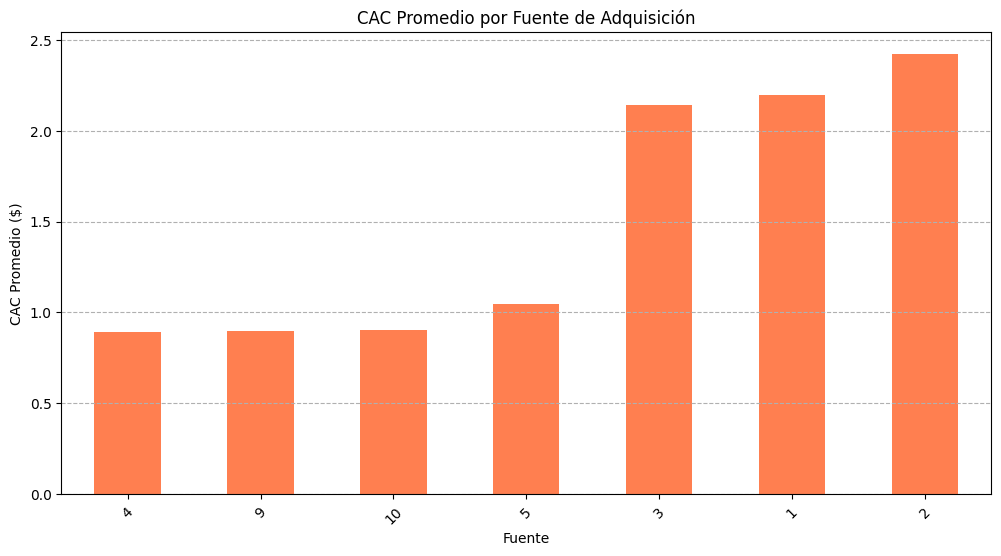

In [25]:
# Calcular los costos totales por fuente y mes
costs_by_source_month = costs.groupby(['source_id', 'cost_month'])['costs'].sum().reset_index()

# Calcular los nuevos clientes por fuente y mes de adquisición
first_sessions = visits.sort_values(by='Start Ts').drop_duplicates('Uid')
first_sessions['acquisition_month'] = first_sessions['Start Ts'].dt.to_period('M')

# Usamos 'Source Id' para agrupar
customers_by_source_month = first_sessions.groupby(['Source Id', 'acquisition_month'])['Uid'].nunique().reset_index()

# Renombramos las columnas para poder unirlas con la tabla de costos
customers_by_source_month.columns = ['source_id', 'cost_month', 'n_customers']

# Unir costos y clientes
cac_by_source_data = pd.merge(costs_by_source_month, customers_by_source_month, on=['source_id', 'cost_month'])

# Calcular CAC
cac_by_source_data['cac'] = cac_by_source_data['costs'] / cac_by_source_data['n_customers']

# Calcular el CAC promedio por fuente
avg_cac_by_source = cac_by_source_data.groupby('source_id')['cac'].mean().sort_values()
print("\n2 --- Costo de Adquisición de Cliente (CAC) Promedio por Fuente ---")
print(avg_cac_by_source)

# Gráfico: CAC promedio por fuente
plt.figure(figsize=(12, 6))
avg_cac_by_source.plot(kind='bar', color='coral')
plt.title('CAC Promedio por Fuente de Adquisición')
plt.xlabel('Fuente')
plt.ylabel('CAC Promedio ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


3 --- Retorno de la Inversión en Marketing (ROMI) por Fuente ---
     revenue      costs      romi
7       1.22       0.00       inf
1   31090.55   20833.27  0.492351
2   46923.61   42806.04  0.096191
9    5759.40    5517.49  0.043844
5   52624.02   51757.10  0.016750
4   56696.83   61073.60 -0.071664
10   4450.33    5822.49 -0.235665
3   54511.24  141321.63 -0.614275


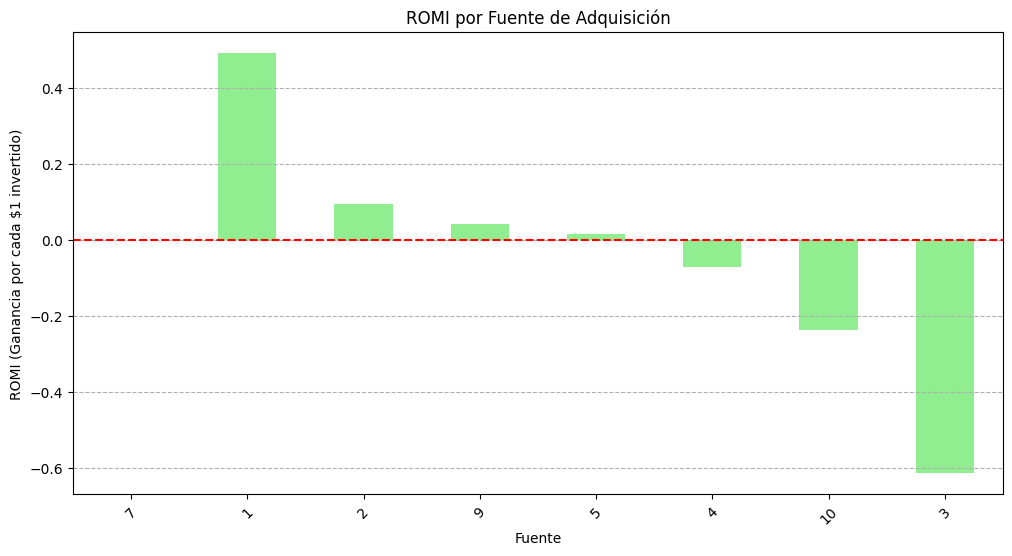

In [26]:
# ROMI por Fuente ---

# Calcular ingresos brutos totales por fuente
first_sessions_source = first_sessions[['Uid', 'Source Id']]
orders_with_source = pd.merge(orders, first_sessions_source, on='Uid')
revenue_by_source = orders_with_source.groupby('Source Id')['Revenue'].sum()

# Calcular costos totales por fuente
costs_by_source_total = costs.groupby('source_id')['costs'].sum()

# Unir ingresos y costos por fuente
romi_data = pd.DataFrame({'revenue': revenue_by_source, 'costs': costs_by_source_total})
romi_data = romi_data.fillna(0) # Rellenar con 0 si una fuente no tuvo ingresos

# Calcular ROMI (Return on Marketing Investment)
# La división funciona porque pandas alinea los DataFrames por su índice (que son los IDs de las fuentes)
romi_data['romi'] = (romi_data['revenue'] - romi_data['costs']) / romi_data['costs']
romi_data = romi_data.sort_values('romi', ascending=False)

print("\n3 --- Retorno de la Inversión en Marketing (ROMI) por Fuente ---")
print(romi_data)

# Gráfico: ROMI por fuente
plt.figure(figsize=(12, 6))
romi_data['romi'].plot(kind='bar', color='lightgreen')
plt.title('ROMI por Fuente de Adquisición')
plt.axhline(0, color='red', linestyle='--') # Línea de punto de equilibrio
plt.xlabel('Fuente')
plt.ylabel('ROMI (Ganancia por cada $1 invertido)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


--- Análisis adicional por Dispositivo ---

LTV (bruto) por tipo de dispositivo:
Device
desktop    1.314281
touch      0.604498
dtype: float64


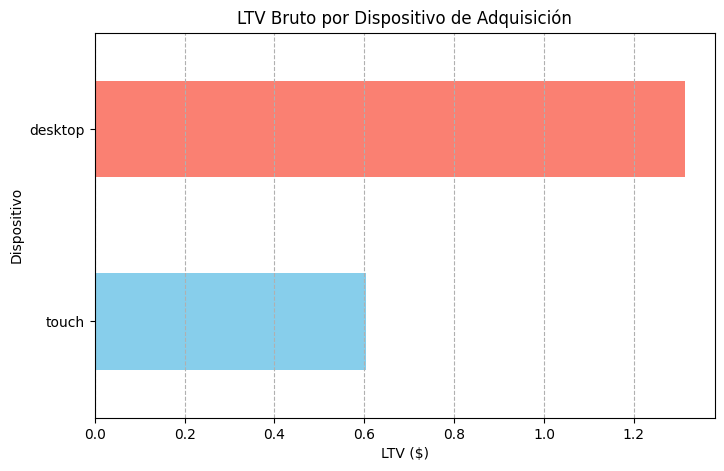

In [27]:
# ---Análisis Adicional por Dispositivo ---

print("\n--- Análisis adicional por Dispositivo ---")
# Obtener el dispositivo de adquisición de cada usuario
device_per_user = first_sessions[['Uid', 'Device']]

# Unir con pedidos. 
orders_with_device = pd.merge(orders, device_per_user, on='Uid')

# Calcular LTV por dispositivo
ltv_by_device = orders_with_device.groupby('Device')['Revenue'].sum() / first_sessions['Device'].value_counts()
print("\nLTV (bruto) por tipo de dispositivo:")
print(ltv_by_device.sort_values(ascending=False))

# Gráfico: LTV por dispositivo
plt.figure(figsize=(8, 5))
ltv_by_device.sort_values().plot(kind='barh', color=['skyblue', 'salmon'])
plt.title('LTV Bruto por Dispositivo de Adquisición')
plt.xlabel('LTV ($)')
plt.ylabel('Dispositivo')
plt.grid(axis='x', linestyle='--')
plt.show()

Conclusiones de marketing

1. Distribución del Gasto: Fuerte concentración en pocas fuentes. El gasto total en marketing durante el período analizado fue de $329,131.62. La distribución de este gasto no es para nada uniforme; al contrario, está muy concentrada.

El canal dominante: La fuente 3 es, por un margen enorme, el canal donde más se invierte, consumiendo 141,321.63, lo que representa un 43% del presupuesto total.
El Top 3: Las fuentes 3, 4 y 5 juntas suman más de 254,000, lo que equivale a un 77% de todo el gasto en marketing.

Conclusión: La estrategia de marketing de Showz depende masivamente del rendimiento de solo tres canales, y en particular, de la fuente 3. El éxito o fracaso de estas tres fuentes determina el destino de casi todo el presupuesto. Es crucial que estos canales sean rentables.

Estrategia a lo largo del tiempo: Una gran apuesta en la temporada navideña. El gráfico de gastos mensuales revela una clara estrategia estacional.

Pico de inversión: Se observa un aumento drástico en la inversión a partir de septiembre de 2017, alcanzando su punto máximo en diciembre de 2017. Esto indica una fuerte campaña de marketing para capitalizar la temporada de fin de año y las vacaciones.

Reducción en 2018: Después del pico de diciembre, el gasto comienza a disminuir progresivamente a lo largo de la primera mitad de 2018.

Conclusión: La empresa apostó fuertemente por la adquisición de clientes durante el último trimestre de 2017. Curiosamente, este período de alta inversión coincide con la adquisición de algunas de las cohortes de clientes más valiosas (según nuestro análisis de LTV anterior). Sin embargo, también es el preludio de las cohortes de 2018, que fueron las peores.

Esto plantea la pregunta clave que los siguientes análisis deberán responder: ¿Fue rentable esta costosa campaña de fin de año o simplemente se infló el gasto sin un retorno adecuado?

2. Análisis del CAC por Fuente

Conclusión 1. Fuerte desalineación entre gasto y eficiencia. Existe una desconexión fundamental entre dónde se invierte el dinero y la eficiencia de esa inversión.

Evidencia Clave: La fuente 3, que consume el 43% del presupuesto total, es uno de los canales más caros, con un CAC de 2.14. Por otro lado, la fuente 4, el segundo canal con más inversión, es el más eficiente de todos con un CAC de solo 0.89.

Interpretación: El presupuesto de marketing no está optimizado. La mayor parte del dinero se está dirigiendo a un canal (fuente 3) que es 2.4 veces más caro que el segundo canal más importante (fuente 4). Esta ineficiencia tiene un impacto directo y negativo en la rentabilidad general de la empresa.

Implicación para el Negocio: Existe una oportunidad enorme y relativamente sencilla para mejorar la rentabilidad. Simplemente reasignando el presupuesto de los canales caros a los baratos se podría reducir drásticamente el CAC promedio general, permitiendo adquirir más clientes con el mismo dinero.

Conclusión 2. Clasificación clara de los canales de marketing. Podemos agrupar las fuentes de adquisición en cuatro categorías estratégicas:

Canales Estrella (Fuentes 4 y 5):
Características: Reciben una inversión considerable y tienen un CAC bajo (entre 0.89 y 1.05). Son eficientes y escalables.
Recomendación: Mantener o Aumentar la Inversión. Estos son los motores probados y rentables de la adquisición de clientes.

El Canal Problemático (Fuente 3):
Características: Recibe la mayor parte del presupuesto (43%) pero tiene un CAC alto ($2.14). Es ineficiente a gran escala.
Recomendación: Investigación urgente y optimización. ¿Por qué es tan caro? ¿Se puede mejorar su rendimiento? Si no es posible optimizarlo, se debe reducir drásticamente su presupuesto y reasignarlo a los canales estrella.

Las Joyas Ocultas (Fuentes 9 y 10):
Características: Tienen un gasto muy bajo, pero son extremadamente eficientes, con un CAC de solo $0.90.
Recomendación: Explorar la Escalabilidad. ¿Es posible invertir más dinero en estos canales manteniendo su bajo costo? Si la respuesta es sí, podrían convertirse en los nuevos canales estrella.

Los Pozos de Dinero (Fuentes 1 y 2):
Características: Tienen el CAC más alto de todos (2.20 y 2.42). Cada cliente adquirido a través de ellos es muy caro.
Recomendación: Recortar la inversión inmediatamente. Estos canales están drenando el presupuesto. A menos que los clientes que traen tengan un LTV excepcionalmente alto (lo cual es poco probable), estos canales deberían ser los primeros en eliminarse de la estrategia de marketing.

Este análisis del CAC nos da el "cómo": nos muestra exactamente qué palancas mover en el presupuesto de marketing para mejorar la salud financiera de la empresa. 

3. Análisis del ROMI por Fuente. El ROMI responde a la pregunta más importante: "Por cada dólar que invertimos en un canal, ¿cuánto ganamos o perdimos?".

Conclusión 1. La Métrica del CAC por sí sola es engañosa. Este es el hallazgo más crítico de todo el análisis de marketing. Juzgar los canales solo por su eficiencia para adquirir clientes (CAC) nos llevó a conclusiones incorrectas. La rentabilidad final (ROMI) cuenta una historia muy diferente.

El Caso de la Fuente 1 vs la Fuente 4:
La Fuente 1 tenía un CAC altísimo de 2.20, por lo que la clasificamos como "Pozo de Dinero". Sin embargo, su ROMI es del +49.2%, el más alto de todos. Esto significa que, aunque es caro atraer a estos clientes, son extremadamente valiosos y generan ganancias sustanciales.
La Fuente 4 tenía el CAC más bajo y eficiente, de solo 0.89, por lo que la clasificamos como "Canal Estrella". Sin embargo, su ROMI es del -7.2%. Esto significa que, aunque es barato atraer a estos clientes, su valor de vida (LTV) es tan bajo que la empresa pierde dinero con ellos.

Interpretación: El mejor canal de marketing no es el que tiene el CAC más bajo, sino el que tiene la mejor relación entre el valor del cliente y su costo (LTV/CAC). Enfocarse solo en reducir el CAC llevó a la empresa a invertir en canales que atraían clientes "baratos pero sin valor" y a subestimar canales que atraían clientes "caros pero muy rentables".

Anomalía de la Fuente 7: Esta fuente muestra un ROMI infinito (inf) porque generó ingresos ($1.22) sin un costo de marketing asociado. Probablemente se trate de tráfico orgánico (búsquedas directas en Google, SEO) o un error de seguimiento. Aunque es rentable, su volumen es insignificante.

Conclusión 2. Basándonos en la rentabilidad final (ROMI), podemos reclasificar los canales de forma definitiva para crear un plan de acción claro.

Canales a ELIMINAR (Pérdida de Dinero):
Fuente 3: Con un ROMI del -61.4%, este canal es un agujero negro financiero. A pesar de consumir el 43% del presupuesto, pierde 61 centavos por cada dólar invertido. Acción: Recortar el presupuesto de forma drástica e inmediata.
Fuente 10: Con un ROMI del -23.6%, también genera pérdidas significativas.
Fuente 4: A pesar de su bajo CAC, su ROMI del -7.2% confirma que no es rentable.

Canales a MANTENER y OPTIMIZAR (Apenas Rentables):
Fuente 5: Con un ROMI del +1.7%, apenas supera el punto de equilibrio. Es funcional, pero no es un motor de crecimiento.
Fuente 9: Su ROMI del +4.4% lo convierte en un contribuyente modesto y eficiente.

Canales a POTENCIAR (Altamente Rentables):
Fuente 1 (El Canal VIP): Con un ROMI del +49.2%, es sin duda el canal más rentable. Atrae a los clientes de mayor calidad. Acción: Investigar a fondo a los clientes de esta fuente para entender su perfil y buscar más como ellos. Aumentar la inversión aquí es la prioridad número uno.
Fuente 2: A pesar de su alto CAC, su ROMI del +9.6% demuestra que también atrae a clientes valiosos y rentables. Acción: Considerar un aumento de la inversión.

Recomendación Estratégica Final: La estrategia de marketing de Showz debe ser reestructurada por completo, basándose en la rentabilidad (ROMI) en lugar de en métricas de vanidad como un CAC bajo.

Reasignación Radical del Presupuesto: Mover la inversión masiva de la Fuente 3 hacia la Fuente 1 y la Fuente 2.

Enfoque en la Calidad del Cliente: Dejar de perseguir al cliente más barato y empezar a invertir en atraer al cliente más rentable.

Análisis Continuo: Implementar un dashboard que mida el ROMI por canal de forma continua para poder tomar decisiones ágiles y evitar que se repitan errores costosos como la inversión en la Fuente 3.

4. Análisis por Dispositivo. Este análisis final nos da una perspectiva sobre cómo el primer punto de contacto del cliente (escritorio vs. móvil) influye en su valor para la empresa.

Conclusión: Los clientes adquiridos en escritorio son más de dos veces más valiosos. Este es un hallazgo claro y de gran impacto estratégico.

Evidencia Clave: Un usuario cuya primera visita fue en un dispositivo de escritorio (desktop) genera en promedio 1.31 a lo largo de su vida. En contraste, un usuario adquirido en un dispositivo móvil (touch) genera solo 0.60.

Interpretación: Los clientes de escritorio son 2.2 veces más valiosos que los clientes móviles. La plataforma desde la que un usuario es adquirido es un fuerte predictor de su rentabilidad futura. 

¿Por Qué Existe esta Diferencia tan Grande? (Hipótesis). Este dato nos obliga a preguntarnos por qué. Las razones pueden ser variadas y apuntan tanto a la estrategia de producto como a la de marketing:

Experiencia de Usuario: Es muy probable que el proceso de compra (seleccionar entradas, introducir datos de pago, etc.) sea más engorroso y difícil en la versión móvil del sitio. Esta fricción puede llevar a tasas de conversión más bajas o a que los usuarios compren menos entradas por transacción.

Comportamiento de Compra: Los usuarios de escritorio pueden tener una intención de compra más "seria". Podrían estar planificando con más detalle, comprando para grupos o adquiriendo entradas para eventos más caros. Los usuarios móviles, en cambio, podrían estar navegando de forma más casual o realizando compras impulsivas de menor valor.

Contexto del Dispositivo: Un usuario en un computador de escritorio está en un ambiente más controlado (casa u oficina), mientras que un usuario móvil puede estar en movimiento, con más distracciones y menos propenso a completar una transacción compleja.

Recomendaciones Estratégicas Finales

Este hallazgo debe generar acciones inmediatas en dos áreas clave de la empresa:

Para el equipo de marketing.
Segmentar las Campañas: Las pujas en las campañas de marketing deben ser diferenciadas. La empresa puede permitirse pagar un CAC más alto por el tráfico de escritorio, ya que su LTV es mayor. Se deben crear anuncios y páginas de destino optimizados específicamente para cada tipo de dispositivo.
Evaluar Canales: Al analizar la rentabilidad de un canal, es crucial considerar qué tipo de tráfico (móvil o escritorio) está generando. Un canal que atrae principalmente tráfico móvil será intrínsecamente menos rentable si la experiencia móvil no se mejora.

Para el equipo de producto y UX (La Mayor Oportunidad).
Investigación de la experiencia móvil: La brecha de LTV es una señal de alerta de que la plataforma móvil probablemente no está funcionando bien. Es fundamental realizar un análisis profundo: ¿La tasa de conversión es más baja en móvil? ¿El ticket promedio es menor? ¿Dónde abandonan los usuarios el embudo de compra?
Priorizar la Optimización Móvil: Cerrar la brecha de LTV entre móvil y escritorio representa una enorme oportunidad de crecimiento en los ingresos. Mejorar la usabilidad y la velocidad del sitio móvil para que sea tan fluido como la versión de escritorio debería ser una de las máximas prioridades de desarrollo para el próximo trimestre.

En resumen, aunque el marketing puede adaptarse a esta realidad, la solución a largo plazo y la mayor oportunidad de crecimiento reside en mejorar el producto móvil para elevar el valor de más de la mitad de los usuarios potenciales.

Conclusión Final SHOWZ

Informe Final y Recomendaciones Estratégicas para Marketing
Para: Dirección de Marketing, Showz.
De: Su Analista de Datos.
Asunto: Plan de Acción para Optimizar la Inversión en Marketing y Maximizar la Rentabilidad.

* Resumen Ejecutivo
  
Nuestro análisis completo de los datos de visitas, ventas y costos de 2017 y 2018 revela una conclusión crítica: el modelo de adquisición de clientes de Showz, especialmente en 2018, es financieramente insostenible y está en una trayectoria de rentabilidad decreciente.

La estrategia actual de marketing está peligrosamente desalineada, invirtiendo la mayor parte del presupuesto en canales no rentables. Sin embargo, este problema es completamente reversible. Recomiendo encarecidamente las siguientes acciones prioritarias:

Reasignación radical del presupuesto: Desinvertir inmediatamente en las fuentes de marketing 3, 4 y 10, que destruyen valor.
Inversión enfocada en la calidad: Reinvertir agresivamente en las fuentes 1 y 2, que han demostrado atraer a los clientes más valiosos y rentables.
Prioridad en la experiencia móvil: Tratar la optimización de la plataforma móvil como una emergencia de producto, ya que los usuarios de escritorio son más del doble de valiosos que los usuarios móviles.

* El Diagnóstico: ¿Por Qué la Estrategia Actual es Insostenible?.
El análisis se ha enfocado en una métrica clave: el Retorno de la Inversión en Marketing (ROMI), que mide la ganancia (o pérdida) por cada dólar invertido. A diferencia del CAC (Costo de Adquisición), que solo mide la eficiencia del costo, el ROMI mide la rentabilidad real.

Nuestros hallazgos demuestran que:

El Gasto está mal dirigido: El 43% del presupuesto total de marketing se destinó a la Fuente 3, la cual tiene el peor rendimiento con un ROMI del -61.4%. Esto significa que por cada 100 USD invertidos en este canal, la empresa perdió $61.

Se ignoran los canales de alto valor: La Fuente 1 es, por un amplio margen, el canal más rentable con un ROMI del +49.2%. A pesar de ello, solo recibió una fracción del presupuesto en comparación con la Fuente 3.

La calidad del cliente se ha deteriorado: El LTV (Valor de Vida del Cliente) de las cohortes adquiridas en 2018 fue significativamente menor que el de las de 2017, pero los costos de adquisición no disminuyeron en proporción, llevando a una pérdida neta en los clientes más nuevos.

* Plan de Acción: Dónde Invertir el Dinero. Recomiendo una reestructuración completa del presupuesto de marketing basada en la rentabilidad probada de cada canal.

Canales a POTENCIAR (Aumentar Inversión):
Fuente 1 (El Canal VIP - ROMI: +49.2%): Este es su mejor canal. Atrae a los clientes más valiosos. Se debe aumentar la inversión aquí significativamente. El objetivo es saturar este canal y analizar el perfil de estos usuarios para encontrar más como ellos.
Fuente 2 (El Canal Premium - ROMI: +9.6%): También es un canal consistentemente rentable. La inversión aquí debe aumentarse de forma segura.

Canales a MANTENER (Inversión Estable):
Fuente 9 (ROMI: +4.4%) y Fuente 5 (ROMI: +1.7%): Estos canales son rentables, aunque por un margen pequeño. Se debe mantener su nivel de inversión actual mientras se monitorea su rendimiento. Sirven como canales de soporte estables y eficientes.

Canales a ELIMINAR (Detener Inversión Inmediatamente):
Fuente 3 (ROMI: -61.4%), Fuente 10 (ROMI: -23.6%) y Fuente 4 (ROMI: -7.2%): Estos tres canales están activamente perdiendo dinero. Cada dólar invertido aquí tiene un retorno negativo. Recomiendo pausar por completo el gasto en estos canales de inmediato. Los fondos liberados (más de 200,000 USD según los datos históricos) deben ser reasignados a los canales ganadores.

* Una Recomendación Adicional Crítica: Producto y Dispositivo.
Nuestro análisis demostró que el LTV de un cliente de escritorio (1.31) es más del doble que el de un cliente móvil (0.60). Esta no es una métrica de marketing, sino de producto. La experiencia móvil probablemente tiene una fricción significativa que limita las conversiones y el valor de las compras.

Acción Recomendada: Crear un equipo de trabajo multidisciplinario (Producto, UX, Marketing) con el objetivo prioritario de diagnosticar y optimizar el embudo de conversión móvil. Cerrar esta brecha de LTV representa una de las mayores oportunidades de crecimiento para la empresa.

En conclusión, Showz tiene un camino claro hacia una rentabilidad sólida y sostenible. Requiere disciplina para abandonar las métricas de vanidad, tomar decisiones valientes basadas en datos de rentabilidad (ROMI) y reasignar los recursos hacia donde han demostrado generar valor real.